# Autism Screening Data Visualisation

In [212]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model

import warnings
warnings.filterwarnings('ignore')

In [213]:
df = pd.read_csv('autism_screening.csv')
print(df.head())

   A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0         1         1         1         1         0         0         1   
1         1         1         0         1         0         0         0   
2         1         1         0         1         1         0         1   
3         1         1         0         1         0         0         1   
4         1         0         0         0         0         0         0   

   A8_Score  A9_Score  A10_Score  ...  gender       ethnicity jundice austim  \
0         1         0          0  ...       f  White-European      no     no   
1         1         0          1  ...       m          Latino      no    yes   
2         1         1          1  ...       m          Latino     yes    yes   
3         1         0          1  ...       f  White-European      no    yes   
4         1         0          0  ...       f               ?      no     no   

   contry_of_res used_app_before result     age_desc relation Class/

## Exploratory Data Analysis

### DataFrame Shape

In [214]:
print(f'Shape of dataframe is: {df.shape}')

Shape of dataframe is: (704, 21)


### To check the data types in different columns of the dataset:

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

### Statistical Info

In [216]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
A1_Score,704.0,0.721591,0.448535,0.0,0.0,1.0,1.0,1.0
A2_Score,704.0,0.453125,0.498152,0.0,0.0,0.0,1.0,1.0
A3_Score,704.0,0.457386,0.498535,0.0,0.0,0.0,1.0,1.0
A4_Score,704.0,0.495739,0.500337,0.0,0.0,0.0,1.0,1.0
A5_Score,704.0,0.498580,0.500353,0.0,0.0,0.0,1.0,1.0
A6_Score,704.0,0.284091,0.451301,0.0,0.0,0.0,1.0,1.0
A7_Score,704.0,0.417614,0.493516,0.0,0.0,0.0,1.0,1.0
A8_Score,704.0,0.649148,0.477576,0.0,0.0,1.0,1.0,1.0
A9_Score,704.0,0.323864,0.468281,0.0,0.0,0.0,1.0,1.0
A10_Score,704.0,0.573864,0.494866,0.0,0.0,1.0,1.0,1.0


### Data Cleaning
The data which is obtained from the primary sources is termed the raw data and required a lot of preprocessing before we can derive any conclusions from it or to some modeling on it. Those preprocessing steps are known as data cleaning and it includes, outliers removal, null value imputation, and removing discrepancies of any sort in the data inputs.

### Rename mispelted column

In [217]:
# Rename mispelled column names 
df = df.rename(columns = {'austim' : 'autism', 'jundice' : 'jaundice', 'contry_of_res' : 'country_of_res'})
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6.0,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5.0,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8.0,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6.0,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2.0,18 and more,?,NO


### Identifying missing values from the dataset:

In [218]:
pd.DataFrame(df.isnull().sum(), columns=["Missing Values"])

,Missing Values
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0
A10_Score,0


### Identifying the upper and lower bound of the data in terms of the variable `age`

In [219]:
print(f"Maximum age is data: {df['age'].max()}\n")

print(f"Minimum age is data: {df['age'].min()}")

Maximum age is data: 383.0

Minimum age is data: 17.0


The maximum age of 383 age is visibly an outlier, so it has to be removed from the dataframe.

In [220]:
df[df['age'] == df['age'].max()]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
52,1,0,0,0,0,0,0,0,0,0,...,f,Pasifika,no,no,New Zealand,no,1.0,18 and more,Self,NO


### Removing outlier based on index

In [221]:
# dropping record number 52
df.drop(index = 52, inplace = True)

# resetting index
df.reset_index(inplace = True)

### Fills missing values in the 'age' column with the rounded mean age

In [222]:
df['age'] = df['age'].fillna(np.round(df['age'].mean(), 0))

The missing values are now imputed, to verify:

In [223]:
pd.DataFrame(df.isnull().sum(), columns=["Missing Values"])

,Missing Values
index,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


### To find out all the unique values in all columns:

In [224]:
for col in df.select_dtypes('O').columns:
    print("-------------------------------")
    print(f'Column name: {col}\n')
    print(f'Unique values:\n{df[col].unique()}\n\n')

-------------------------------
Column name: gender

Unique values:
['f' 'm']


-------------------------------
Column name: ethnicity

Unique values:
['White-European' 'Latino' '?' 'Others' 'Black' 'Asian' 'Middle Eastern '
 'Pasifika' 'South Asian' 'Hispanic' 'Turkish' 'others']


-------------------------------
Column name: jaundice

Unique values:
['no' 'yes']


-------------------------------
Column name: autism

Unique values:
['no' 'yes']


-------------------------------
Column name: country_of_res

Unique values:
['United States' 'Brazil' 'Spain' 'Egypt' 'New Zealand' 'Bahamas'
 'Burundi' 'Austria' 'Argentina' 'Jordan' 'Ireland' 'United Arab Emirates'
 'Afghanistan' 'Lebanon' 'United Kingdom' 'South Africa' 'Italy'
 'Pakistan' 'Bangladesh' 'Chile' 'France' 'China' 'Australia' 'Canada'
 'Saudi Arabia' 'Netherlands' 'Romania' 'Sweden' 'Tonga' 'Oman' 'India'
 'Philippines' 'Sri Lanka' 'Sierra Leone' 'Ethiopia' 'Viet Nam' 'Iran'
 'Costa Rica' 'Germany' 'Mexico' 'Russia' 'Armenia' 

Notably, ethnicity and relation have some invalid values. To replace them:


### Replaces specific values in the df with corresponding numerical or categorical representations. Specifically, it replaces 'yes' with 1, 'no' with 0, '?' with 'Others', and 'others' with 'Others'.

In [225]:
df = df.replace({'yes':1, 'no':0, '?':'Others', 'others':'Others'})

To verify that the invalid values have been removed:

In [226]:
df['ethnicity'].value_counts()

ethnicity
White-European     233
Others             126
Asian              123
Middle Eastern      92
Black               43
South Asian         36
Latino              20
Hispanic            13
Pasifika            11
Turkish              6
Name: count, dtype: int64

In [227]:
df['relation'].value_counts()

relation
Self                        521
Others                      100
Parent                       50
Relative                     28
Health care professional      4
Name: count, dtype: int64

## Data Visualization

Using a histogram to visualise the number of autistic and non-autistic patients:

In [228]:
#using plotly to visualize the number of autistic and non-autistic patients
fig = px.histogram(df, x='Class/ASD')

# Update layout to center the title
fig.update_layout(title_text='<b>Count of Autistic and Non-Autistic Patients</b>', title_x=0.5)

# Show the plot
fig.show()

Using a histogram to visualise the count of the gender:

In [229]:
#using plotly to visualize the count of the gender 
fig = px.histogram(df, x='gender')

# Update layout to center the title
fig.update_layout(title_text='<b>Count of Males and Females </b>', title_x=0.5)

# Show the plot
fig.show()

Using a bar chart to visualise the number of autistic and non-autistic patients based on gender:

In [230]:
#using plotly to visualize the count of the males and females for autistic and non-autistic patients
fig = px.bar(df.groupby(['Class/ASD', 'gender']).size().reset_index(name='count'), 
             x='Class/ASD', 
             y='count', 
             color='gender',
             title='Count of Males and Females of Autistic and Non-Autistic Patients')

# Update layout to center the title
fig.update_layout(title_text='<b>Count of Males and Females of Autistic and Non-Autistic Patients</b>', title_x=0.5)

# Show the plot
fig.show()  

Visualising the count of autistic patients from different ethnicity within the dataset:

In [231]:
asd_patients_ethnicity = pd.DataFrame(df[df['Class/ASD'] == "YES"]['ethnicity'].value_counts())

In [232]:
asd_patients_ethnicity.style.bar(color="#84A9AC") 

,count
ethnicity,
White-European,109
Others,18
Black,18
Asian,16
Latino,10
Middle Eastern,8
Hispanic,5
South Asian,3
Turkish,1


In [233]:
# Count of Autistic Patients from Different Ethnicity
filtered_df = df[df['Class/ASD'] == "YES"]

# Create a histogram
fig = px.histogram(filtered_df, x='ethnicity')

# Update layout to center the title and set the category order
fig.update_layout(
    title_text='<b>Count of Autistic Patients from Different Ethnicity</b>',
    title_x=0.5,
    xaxis=dict(categoryorder='total descending')
)

# Show the plot
fig.show()

In [234]:
label = asd_patients_ethnicity.index
value = asd_patients_ethnicity['count']

fig = go.Figure(data=[go.Pie(labels = label,
                             values = value,
                             rotation = 90)])

fig.update_traces(textposition = 'inside',
                  textinfo = 'percent+label',
                  marker = dict(line = dict(color = '#000000', width = 1.5)))

fig.update_layout(title_text='<b>Individual Ethnicity Counts of ASD Patients</b>',
                  title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15,
                  template='plotly_dark')

fig.show()

Using a pie chart to visualise the count of people with Jaundice:

In [235]:
#using plotly to visualize 'jundice' with pie chart
fig = px.pie(df, names='jaundice')

# Update layout to center the title
fig.update_layout(title_text='<b>Count of People with Jaundice</b>', title_x=0.5)

# Show the plot
fig.show()

Using a bar chart to visualise autistic and non-autistic patients split into those with and without Jaundice:

In [236]:
#using plotly to visualize the count of people with jundice for autistic and non-autistic patients
fig = px.bar(df.groupby(['Class/ASD', 'jaundice']).size().reset_index(name='count'), 
             x='Class/ASD', 
             y='count', 
             color='jaundice',
             title='Count of people with jundice for Autistic and Non-Autistic Patients')

# Update layout to center the title
fig.update_layout(title_text='<b>Count of people with jaundice for Autistic and Non-Autistic Patients</b>', title_x=0.5)

# Show the plot
fig.show()  

Visualising the count of autistic patients in different countries within the dataset:

In [237]:
asd_patients_country = pd.DataFrame(df[df['Class/ASD'] == "YES"]['country_of_res'].value_counts())

In [238]:
asd_patients_country.style.bar(color="#84A9AC") 

,count
country_of_res,
United States,53
United Kingdom,29
New Zealand,15
Australia,12
Canada,10
India,6
France,5
Brazil,5
Malaysia,4


In [239]:
# Count of Autistic Patients in Different Countries
filtered_df = df[df['Class/ASD'] == "YES"]

# Create a histogram
fig = px.histogram(filtered_df, x='country_of_res')

# Update layout to center the title and set the category order
fig.update_layout(
    title_text='<b>Count of Autistic Patients in Different Countries</b>',
    title_x=0.5,
    xaxis=dict(categoryorder='total descending')
)

# Show the plot
fig.show()

In [240]:
label = asd_patients_country.index
value = asd_patients_country['count']

fig = go.Figure(data=[go.Pie(labels = label,
                             values = value,
                             rotation = 90)])

fig.update_traces(textposition = 'inside',
                  textinfo = 'percent+label',
                  marker = dict(line = dict(color = '#000000', width = 1.5)))

fig.update_layout(title_text='<b>Individual Country Counts of ASD Patients</b>',
                  title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15,
                  template='plotly_dark')

fig.show()

Using a pie chart to visualise the count of people who used the screening app:

In [241]:
#using plotly to visualize 'used_app_before' with pie chart
fig = px.pie(df, names='used_app_before')

# Update layout to center the title
fig.update_layout(title_text='<b>Count of People who used the screening App before</b>', title_x=0.5)

# Show the plot
fig.show()

Using a bar chart to visualise autistic and non-autistic patients split into those who used the screening app before:

In [242]:
#using plotly to visualize used_app_before for autistic and non-autistic patients
fig = px.bar(df.groupby(['Class/ASD', 'used_app_before']).size().reset_index(name='count'), 
             x='Class/ASD', 
             y='count', 
             color='used_app_before',
             title='Count of People who used the screening App before for Autistic and Non-Autistic Patients')

# Update layout to center the title
fig.update_layout(title_text='<b>Count of People who used the screening App before for Autistic and Non-Autistic Patients</b>', title_x=0.5)

# Show the plot
fig.show() 

Using a bar chart to visualise the average age of autistic and non-autistic patients:

In [243]:
#using plotly to visualize the average age of autistic and non-autistic patients
fig = px.bar(df.groupby('Class/ASD', as_index=False).agg({'age':'mean'}), 
             x='Class/ASD', 
             y='age', 
             color='Class/ASD',
             title='Average Age of Autistic and Non-Autistic Patients')

# Update layout to center the title
fig.update_layout(title_text='<b>Average Age of Autistic and Non-Autistic Patients</b>', title_x=0.5)

# Show the plot
fig.show()

Using a bar graph to visualise the count of people over 18 for autistic and non-autistic patients:

In [244]:
#using plotly to visualize the count of age_desc for autistic and non-autistic patients
fig = px.bar(df.groupby(['Class/ASD', 'age_desc']).size().reset_index(name='count'), 
             x='Class/ASD', 
             y='count', 
             color='age_desc',
             title='Count of People over 18 for Autistic and Non-Autistic Patients')

# Update layout to center the title
fig.update_layout(title_text='<b>Count of People over 18 for Autistic and Non-Autistic Patients</b>', title_x=0.5)

# Show the plot
fig.show() 

## Data Preprocessing

### Drop unneeded column

In [245]:
#drop the 'age_desc' column
df = df.drop('age_desc', axis=1)

### Splitting Features

In [246]:
X = df.drop('Class/ASD', axis=1)
y = df['Class/ASD']

### Handling Catergorical Features

In [247]:
# Columns to apply label encoding
cols_to_encode = ['gender', 'ethnicity', 'jaundice', 'autism', 'country_of_res', 'used_app_before', 'relation']

# Apply label encoding to X
label_encoder_X = LabelEncoder()
for col in cols_to_encode:
    X[col] = label_encoder_X.fit_transform(X[col])

# Apply label encoding to y
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)

In [248]:
X.head(10)

,index,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,relation
0,0,1,1,1,1,0,0,1,1,0,0,26.0,0,9,0,0,64,0,6.0,4
1,1,1,1,0,1,0,0,0,1,0,1,24.0,1,3,0,1,13,0,5.0,4
2,2,1,1,0,1,1,0,1,1,1,1,27.0,1,3,1,1,56,0,8.0,2
3,3,1,1,0,1,0,0,1,1,0,1,35.0,0,9,0,1,64,0,6.0,4
4,4,1,0,0,0,0,0,0,1,0,0,40.0,0,5,0,0,22,0,2.0,1
5,5,1,1,1,1,1,0,1,1,1,1,36.0,1,5,1,0,64,0,9.0,4
6,6,0,1,0,0,0,0,0,1,0,0,17.0,0,1,0,0,64,0,2.0,4
7,7,1,1,1,1,0,0,0,0,1,0,64.0,1,9,0,0,43,0,5.0,2
8,8,1,1,0,0,1,0,0,1,1,1,29.0,1,9,0,0,64,0,6.0,4
9,9,1,1,1,1,0,1,1,1,1,0,17.0,1,0,1,1,9,0,8.0,0


In [249]:
y[:5]

array([0, 0, 1, 0, 0])

### Splitting train and test data:

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100)

In [251]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {y_test.shape}")

Shape of X_train is: (562, 20)
Shape of Y_train is: (562,)

Shape of X_test is: (141, 20)
Shape of Y_test is: (141,)


## Building ANN Model

### Model Structure

In [252]:
model = Sequential([
        Dense(10, activation='relu', input_dim=20),
        Dense(8, activation='relu'),
        Dense(1, activation='sigmoid')
])

### Model Compiling

In [253]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### Model Summary

In [254]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 10)                  │             210 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 8)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 307 (1.20 KB)

 Trainable params: 307 (1.20 KB)

 Non-trainable params: 0 (0.00 B)

### Model Fitting

In [255]:
history = model.fit(X_train, y_train, epochs=150, validation_split=0.25)

Epoch 1/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.2812 - loss: 28.6799 - val_accuracy: 0.2482 - val_loss: 22.2759
Epoch 2/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3020 - loss: 21.2355 - val_accuracy: 0.2695 - val_loss: 15.8238
Epoch 3/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3286 - loss: 13.5773 - val_accuracy: 0.2766 - val_loss: 9.6989
Epoch 4/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3368 - loss: 8.1229 - val_accuracy: 0.3191 - val_loss: 3.8420
Epoch 5/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3989 - loss: 2.7786 - val_accuracy: 0.7589 - val_loss: 0.9694
Epoch 6/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7077 - loss: 1.1635 - val_accuracy: 0.7518 - val_loss: 0.9981
Epoch 7/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7187 - loss: 1.0002 - val_accuracy: 0.6596 - val_loss: 0.8618
Epoch 8/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6283 - loss: 0.8186 - val_accuracy: 0.659

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8698 - loss: 0.3355 - val_accuracy: 0.8794 - val_loss: 0.2977
Epoch 52/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8445 - loss: 0.3530 - val_accuracy: 0.8723 - val_loss: 0.3230
Epoch 53/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8841 - loss: 0.3034 - val_accuracy: 0.8723 - val_loss: 0.2936
Epoch 54/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8819 - loss: 0.3009 - val_accuracy: 0.8723 - val_loss: 0.3044
Epoch 55/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9159 - loss: 0.2989 - val_accuracy: 0.8652 - val_loss: 0.2941
Epoch 56/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8782 - loss: 0.2987 - val_accuracy: 0.8652 - val_loss: 0.2923
Epoch 57/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8771 - loss: 0.2944 - val_accuracy: 0.8723 - val_loss: 0.3077
Epoch 58/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8935 - loss: 0.2977 - val_accuracy: 0.8582 - val_lo

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9092 - loss: 0.2421 - val_accuracy: 0.8723 - val_loss: 0.2322
Epoch 102/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9028 - loss: 0.2404 - val_accuracy: 0.8723 - val_loss: 0.2330
Epoch 103/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8866 - loss: 0.2551 - val_accuracy: 0.9007 - val_loss: 0.2427
Epoch 104/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9081 - loss: 0.2278 - val_accuracy: 0.8865 - val_loss: 0.2322
Epoch 105/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9207 - loss: 0.2144 - val_accuracy: 0.8936 - val_loss: 0.2714
Epoch 106/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9099 - loss: 0.2226 - val_accuracy: 0.8865 - val_loss: 0.2239
Epoch 107/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9159 - loss: 0.2361 - val_accuracy: 0.8794 - val_loss: 0.2237
Epoch 108/150
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9129 - loss: 0.2231 - val_accuracy: 0.8865 -

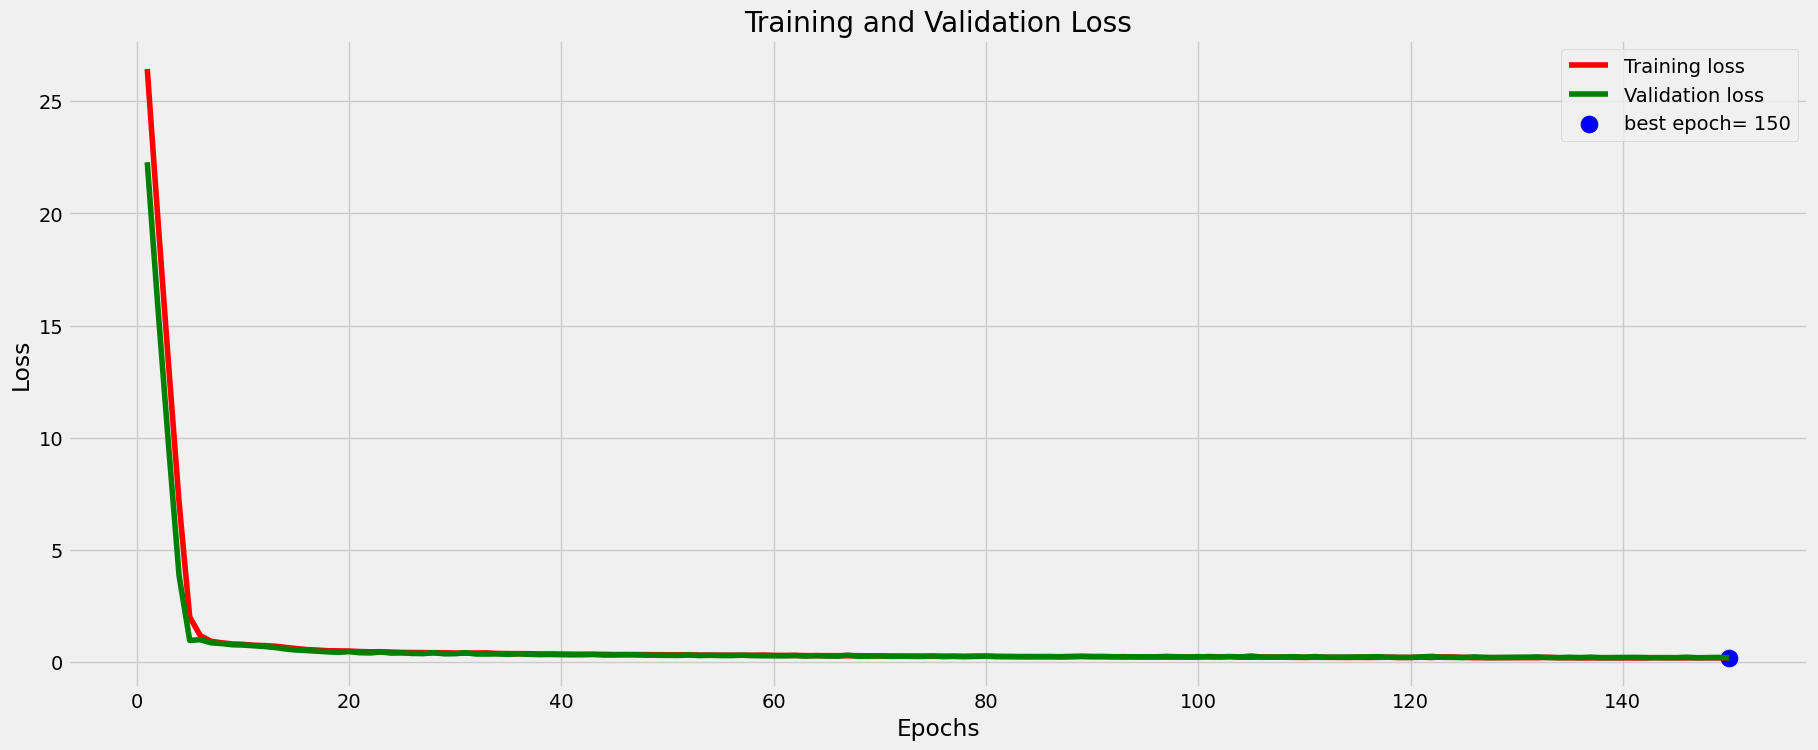

In [256]:
# Define needed variables
tr_loss = history.history['loss']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]

Epochs = [i+1 for i in range(len(tr_loss))]
loss_label = f'best epoch= {str(index_loss + 1)}'

# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')

plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout
plt.show()

In [257]:
acc = history.history['accuracy']

acc_loss_df = pd.DataFrame({"Accuracy" : acc,
                            "Loss" : tr_loss,
                            "Epoch" : Epochs})

acc_loss_df.style.bar(color = '#84A9AC',
                      subset = ['Accuracy','Loss'])

,Accuracy,Loss,Epoch
0,0.280285,26.428207,1
1,0.296912,19.759068,2
2,0.299287,13.302391,3
3,0.330166,7.106555,4
4,0.470309,2.008446,5
5,0.722090,1.178131,6
6,0.705463,0.928572,7
7,0.627078,0.861765,8
8,0.686461,0.810624,9
9,0.657957,0.792250,10


### Prediction

In [258]:
y_pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


In [259]:
y_pred = (y_pred > 0.5)

In [260]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[97,  6],
       [ 7, 31]], dtype=int64)

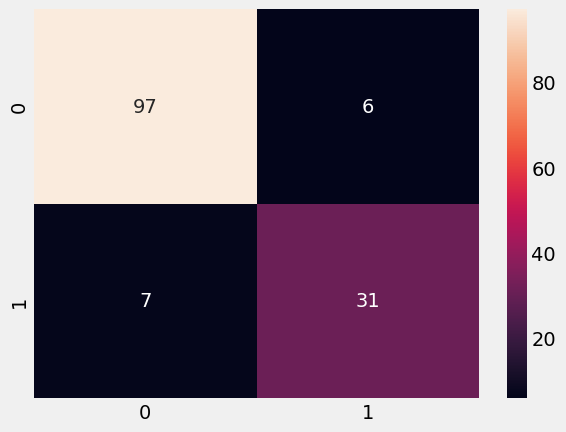

In [261]:
sb.heatmap(cm, annot=True)
plt.show()

In [262]:
# Extract true positives, true negatives, false positives, and false negatives
tn, fp, fn, tp = cm.ravel()

# Calculate accuracy
accuracy = (tp + tn) / (tp + tn + fp + fn)

# Calculate True Positive Rate (TPR) and True Negative Rate (TNR)
tpr = tp / (tp + fn)
tnr = tn / (tn + fp)

print("Classification Accuracy:", accuracy)
print("True Positive Rate (TPR):", tpr)
print("True Negative Rate (TNR):", tnr)

Classification Accuracy: 0.9078014184397163
True Positive Rate (TPR): 0.8157894736842105
True Negative Rate (TNR): 0.941747572815534
